# DATA DISCRIPTION AND PROBLEM DEFINITION:
    
   ## This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).
    
    Field description

    Province_State - The name of the State within the USA.
    Country_Region - The name of the Country (US).
    Last_Update - The most recent date the file was pushed.
    Lat - Latitude.
    Long_ - Longitude.
    Confirmed - Aggregated confirmed case count for the state.
    Deaths - Aggregated Death case count for the state.
    Recovered - Aggregated Recovered case count for the state.
    Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
    FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
    Incident_Rate - confirmed cases per 100,000 persons.
    People_Tested - Total number of people who have been tested.
    People_Hospitalized - Total number of people hospitalized.
    Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
    UID - Unique Identifier for each row entry.
    ISO3 - Officialy assigned country code identifiers.
    Testing_Rate - Total number of people tested per 100,000 persons.
    Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.
    
## Field description

    FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
    Admin2: County name. US only.
    Province_State: Province, state or dependency name.
    Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
    Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
    Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
    Confirmed: Confirmed cases include presumptive positive cases and probable cases, in accordance with CDC guidelines as of April 14.
    Deaths: Death totals in the US include confirmed and probable, in accordance with CDC guidelines as of April 14.
    Recovered: Recovered cases outside China are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
    Active: Active cases = total confirmed - total recovered - total deaths.
    Incidence_Rate: Admin2 + Province_State + Country_Region.
    Case-Fatality Ratio (%): = confirmed cases per 100,000 persons.
    US Testing Rate: = total test results per 100,000 persons. The "total test results" is equal to "Total test results (Positive + Negative)" from COVID Tracking Project.
    US Hospitalization Rate (%): = Total number hospitalized / Number confirmed cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. The "hospitalization rate" and "hospitalized - Cumulative" data is only presented for those states which provide cumulative hospital data.
    

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("COVID_19_Datasets.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


# EXPLORATORY DATA ANALYSIS

In [3]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

# STATISTICAL DATAS

In [6]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [7]:
df.shape

(58, 18)

# WE WILL DROP "Province_State","Country_Region","Last_Update" ATTRIBUTES , SINCE THEY WONT PROVIDE ANY COMPUTABLE DATA FOR OUR ANALYSIS.

In [8]:
df.drop(["Province_State","Country_Region","Last_Update"],axis=1,inplace=True)
df

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


# FINDING NaN VALUES

In [9]:
df.isnull().sum()

Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [10]:
df["Hospitalization_Rate"].mean()

14.342541433640415

In [11]:
df["People_Hospitalized"].mean()

4897.454545454545

In [12]:
df["Recovered"].mean()

7007.428571428572

In [13]:
df["Long_"].mean()

-85.2066142857143

In [14]:
df.drop(["Lat","Long_","People_Hospitalized","Hospitalization_Rate"],axis=1,inplace=True)
df

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
0,13052,522,NaN,12530.0,1,266.194321,164450.0,3.999387,84000001,USA,3353.942386
1,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,84000002,USA,5063.940017
2,0,0,NaN,0.0,60,0.000000,124.0,NaN,16,ASM,222.857246
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,84000004,USA,2272.859351
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,84000005,USA,3189.670370
5,85997,3497,NaN,82500.0,6,217.646575,1380120.0,4.066421,84000006,USA,3492.893832
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,84000008,USA,2289.339188
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,84000009,USA,5349.302875
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,84000010,USA,4663.552976
9,49,0,NaN,49.0,88888,NaN,NaN,0.000000,84088888,USA,NaN


In [16]:
#dropping Cabin attribute 
df.drop(["Recovered"],axis=1,inplace=True)
df

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
0,13052,522,12530.0,1,266.194321,164450.0,3.999387,84000001,USA,3353.942386
1,401,10,39.0,2,54.815493,37045.0,2.493766,84000002,USA,5063.940017
2,0,0,0.0,60,0.000000,124.0,NaN,16,ASM,222.857246
3,14906,747,10386.0,4,204.788838,165435.0,5.011405,84000004,USA,2272.859351
4,5003,107,1044.0,5,165.782801,96258.0,2.138717,84000005,USA,3189.670370
5,85997,3497,82500.0,6,217.646575,1380120.0,4.066421,84000006,USA,3492.893832
6,22797,1299,18020.0,8,395.868121,131837.0,5.698118,84000008,USA,2289.339188
7,39017,3529,29224.0,9,1094.357902,190718.0,9.044775,84000009,USA,5349.302875
8,8194,310,3919.0,10,841.476990,45412.0,3.783256,84000010,USA,4663.552976
9,49,0,49.0,88888,NaN,NaN,0.000000,84088888,USA,NaN


In [20]:
df["ISO3"].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

# REPLACING THE NaN VALUES WITH THE MEAN VALUE OF EACH ATTRIBUTE.

In [17]:
#replacing the mean value with NaN values in attribute 
df["Incident_Rate"].fillna(df["Incident_Rate"].mean(),inplace=True)
df["People_Tested"].fillna(df["People_Tested"].mean(),inplace=True)
df["Mortality_Rate"].fillna(df["Mortality_Rate"].mean(),inplace=True)
df["Testing_Rate"].fillna(df["Testing_Rate"].mean(),inplace=True)
df.isnull().sum()

Confirmed         0
Deaths            0
Active            0
FIPS              0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
UID               0
ISO3              0
Testing_Rate      0
dtype: int64

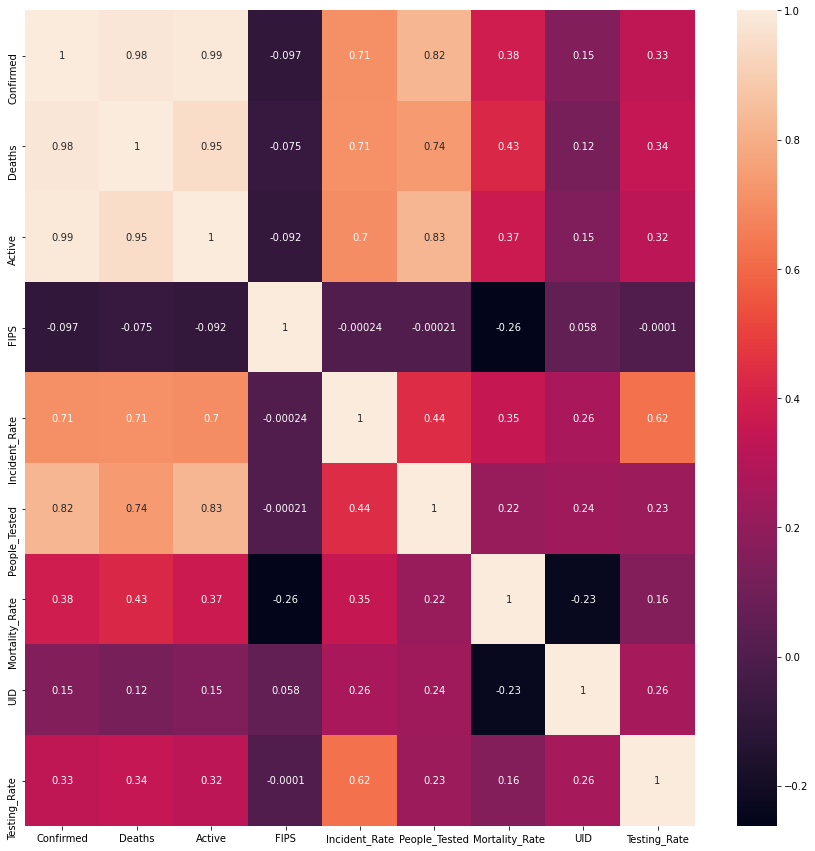

In [18]:
corr=df.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corr,annot=True)

# USING LABEL ENCODER TO ENCODE THE ATTRIBUTE TO CONVERT IN TO COMPUTABLE VALUE

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ISO3'] = le.fit_transform(df['ISO3'])
df

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
0,13052,522,12530.0,1,266.194321,1.644500e+05,3.999387,84000001,4,3353.942386
1,401,10,39.0,2,54.815493,3.704500e+04,2.493766,84000002,4,5063.940017
2,0,0,0.0,60,0.000000,1.240000e+02,4.458248,16,0,222.857246
3,14906,747,10386.0,4,204.788838,1.654350e+05,5.011405,84000004,4,2272.859351
4,5003,107,1044.0,5,165.782801,9.625800e+04,2.138717,84000005,4,3189.670370
5,85997,3497,82500.0,6,217.646575,1.380120e+06,4.066421,84000006,4,3492.893832
6,22797,1299,18020.0,8,395.868121,1.318370e+05,5.698118,84000008,4,2289.339188
7,39017,3529,29224.0,9,1094.357902,1.907180e+05,9.044775,84000009,4,5349.302875
8,8194,310,3919.0,10,841.476990,4.541200e+04,3.783256,84000010,4,4663.552976
9,49,0,49.0,88888,396.230806,2.258534e+05,0.000000,84088888,4,3894.186870


# PLOTTING OUTLIERS

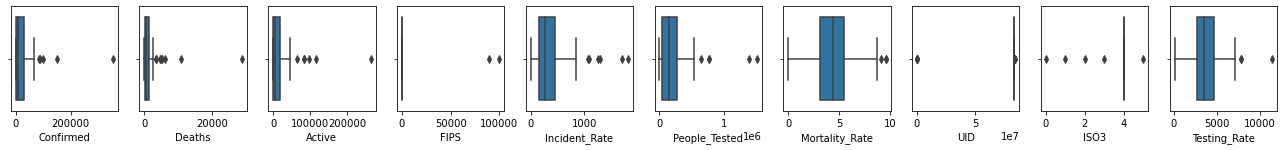

In [22]:
collist=df.columns.values
ncol=11
nrow=11
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

# FINDING SKEWNESS

In [23]:
df.skew()

Confirmed         4.708614
Deaths            5.489201
Active            4.180953
FIPS              5.269070
Incident_Rate     1.988351
People_Tested     2.829700
Mortality_Rate    0.496115
UID              -3.027480
ISO3             -4.126625
Testing_Rate      1.313407
dtype: float64

# CORRECTING THE SKEWNESS

In [31]:
#removing skewness using boxcox
from scipy.stats import boxcox
#0 represents log transform



df["People_Tested"]=boxcox(df["People_Tested"],0)

df["UID"]=boxcox(df["UID"],0)

df["Testing_Rate"]=boxcox(df["Testing_Rate"],0)

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.62999251e-01, 2.68934023e-01, 1.84202386e-01, 2.01948509e+00,
        3.31615693e-01, 3.17894613e-01, 2.18727182e-01, 2.95406710e-01,
        2.17198770e-01, 1.27182370e-02],
       [5.05788407e-01, 3.95372994e-01, 4.89328519e-01, 1.61957424e+00,
        8.70668532e-01, 3.67338825e-01, 9.36418161e-01, 2.95406712e-01,
        2.17198770e-01, 5.95260395e-01],
       [5.13484119e-01, 3.97842505e-01, 4.90281199e-01, 3.42744579e-01,
        1.01045759e+00, 5.40770656e+00, 4.23371775e-16, 4.97357099e+00,
        5.38170286e+00, 3.82089750e+00],
       [2.27418578e-01, 2.13370022e-01, 2.36575329e-01, 1.21966338e+00,
        4.88210372e-01, 3.20395953e-01, 2.63675605e-01, 2.95406715e-01,
        2.17198770e-01, 5.37430520e-01],
       [4.17470037e-01, 3.71418736e-01, 4.64778702e-01, 1.09092084e+00,
        5.87682563e-01, 8.61963402e-02, 1.10566079e+00, 2.95406717e-01,
        2.17198770e-01, 5.82867072e-02],
       [1.13691024e+00, 4.65745547e-01, 1.52500229e+00, 9.85730528e-01,
   

In [33]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
0,13052,522,12530.0,0.000000,266.194321,0.910582,3.999387,2.903964,4,8.117892
1,401,10,39.0,0.693147,54.815493,0.855805,2.493766,2.903964,4,8.529900
3,14906,747,10386.0,1.386294,204.788838,0.910782,5.011405,2.903964,4,7.728794
4,5003,107,1044.0,1.609438,165.782801,0.892060,2.138717,2.903964,4,8.067673
5,85997,3497,82500.0,1.791759,217.646575,0.974123,4.066421,2.903964,4,8.158486
6,22797,1299,18020.0,2.079442,395.868121,0.903082,5.698118,2.903964,4,7.736018
7,39017,3529,29224.0,2.197225,1094.357902,0.915504,9.044775,2.903964,4,8.584722
8,8194,310,3919.0,2.302585,841.476990,0.863919,3.783256,2.903964,4,8.447533
10,7551,407,6085.0,2.397895,1069.927127,0.859305,5.390015,2.903964,4,8.652966
11,47471,2096,45375.0,2.484907,221.024217,0.958132,4.415327,2.903964,4,8.186293


# PREPARING DATA-SET FOR TRAINING AND TESTING

In [34]:
# SPLITIING THE DATA FOR TESTING AND TRAINING
x=df.drop("Deaths",axis=1)
y=df["Deaths"]

In [35]:
#USING STANDARD SCALER FOR STANDARDISING THE DATA-SET
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [37]:
x_train.shape

(40, 9)

In [38]:
y_train.shape

(40,)

In [39]:
x_test.shape

(18, 9)

In [40]:
y_test.shape

(18,)

# MACHINE LEARNING MODELS
## For the above data-set we will use

## 1.LINEAR REGRESSION

## 2.SGD REGRESSOR

## 3.RANDOM FOREST


In [41]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=20.56363799297167,cross_value_score=45.18869836791482,and difference=-24.625060374943146


In [42]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=87.84971107566506,cross_value_score=21.84462157337327,and difference=66.00508950229178


In [60]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGD,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=82.40181210905467,cross_value_score=42.97183196046612,and difference=39.429980148588555


# From the above Machine Learning Models we can conclude that LINEAR REGRESSION has the highest accuracy rate of "87.8%" with a negligble difference.

## Thus, we will use "LINEAR REGRESSION" for the prediction.

## HYPER TUNNING THE MACHINE LEARNING MODEL :


In [61]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [62]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(lr,parameters,cv=5,scoring="r2")
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("final accuracy = ",r2_score(y_test,GCV_pred)*100)

final accuracy =  87.849711075665


# SAVING THE MODEL

In [63]:
import joblib 
joblib.dump(lr,"COVID_19_Datasets.pkl")

['COVID_19_Datasets.pkl']

# CONCLUSION REMARKS:
We can visibly see that the Machine learning model performs well with a higher accuracy of prediction.